In [2]:
import sys
from pandas import *
import numpy as np
import matplotlib
from matplotlib import pyplot
import itertools as it
import matplotlib.backends.backend_pdf
import math
from matplotlib.pyplot import cm
from dateutil import parser
import scipy
from scipy.stats import mstats
import re
import collections
import os
import matplotlib.pyplot as plt
import json

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np

rfmixOutput = np.loadtxt('/Path/to/Rprocessed/FBoutputFile',skiprows=1)
plt.imshow(rfmixOutput, interpolation=‘nearest’, aspect=‘auto’)
plt.colorbar()
# plt.savefig(‘FigureName.pdf’)
#to plot a certain region of the chromosome, I manually find the indexes of SNPs in the region I want to plot, and use the ‘usecols’ argument...
rfmixOutput_localRegion = np.loadtxt(‘/Path/to/Rprocessed/FBoutputFile’,skiprows=1, usecols=range(280594,293641))
plt.imshow(rfmixOutput_localRegion, interpolation=‘nearest’, aspect=‘auto’)

In [20]:
def plot_rfmix_output(rfmix_file,outname,pos_start=None,pos_end=None):
    
    rfmix_out_df = read_csv(rfmix_file,delimiter='\t',skiprows=1)
    if(pos_start == None):
        pos_start = min(rfmix_out_df['physical_position'])
    if(pos_end == None):
        pos_end = max(rfmix_out_df['physical_position'])
    df_toplot = rfmix_out_df.loc[(rfmix_out_df['physical_position'] >= pos_start) & (rfmix_out_df['physical_position'] <= pos_end)]
    plot_df = df_toplot[list(df_toplot.columns[4:])]
    
    fig,ax = plt.subplots()
    im = ax.imshow(np.array(plot_df), interpolation='nearest', aspect='auto')
    fig.colorbar(im)
    
#     plt.savefig(outname)
    plt.show()

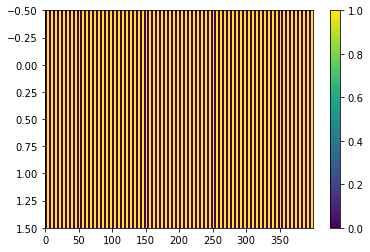

In [21]:
# outname = '/local3/jake/admix_simul/testing/low_memory_version/RFMix/first_test/singlemigr.wrecombmap.chr4_5Mbwindow.output.v3.rep1_only.rfmix_output.fb.tsv'
outname = '/local3/jake/admix_simul/testing/specify_pop_epoch/singlemigr.wrecombmap.chr4_5Mbwindow.twomassmigs.output.epoch0.epoch2.rfmix_output.fb.tsv'
plot_rfmix_output(outname,'test.png',0,100000)



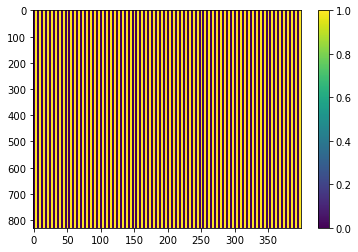

In [15]:
plot_rfmix_output(outname,'test.png')

In [22]:
test

['POP2ID0:::hap1:::Ancient_African',
 'POP2ID0:::hap1:::Modern_European',
 'POP2ID0:::hap2:::Ancient_African',
 'POP2ID0:::hap2:::Modern_European',
 'POP2ID1:::hap1:::Ancient_African',
 'POP2ID1:::hap1:::Modern_European',
 'POP2ID1:::hap2:::Ancient_African',
 'POP2ID1:::hap2:::Modern_European',
 'POP2ID2:::hap1:::Ancient_African',
 'POP2ID2:::hap1:::Modern_European',
 'POP2ID2:::hap2:::Ancient_African',
 'POP2ID2:::hap2:::Modern_European',
 'POP2ID3:::hap1:::Ancient_African',
 'POP2ID3:::hap1:::Modern_European',
 'POP2ID3:::hap2:::Ancient_African',
 'POP2ID3:::hap2:::Modern_European',
 'POP2ID4:::hap1:::Ancient_African',
 'POP2ID4:::hap1:::Modern_European',
 'POP2ID4:::hap2:::Ancient_African',
 'POP2ID4:::hap2:::Modern_European',
 'POP2ID5:::hap1:::Ancient_African',
 'POP2ID5:::hap1:::Modern_European',
 'POP2ID5:::hap2:::Ancient_African',
 'POP2ID5:::hap2:::Modern_European',
 'POP2ID6:::hap1:::Ancient_African',
 'POP2ID6:::hap1:::Modern_European',
 'POP2ID6:::hap2:::Ancient_African',
 